In [14]:
import random
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [15]:
data_diesel = pd.read_csv('data/data_diesel_diff.csv', sep=',')
data_diesel = data_diesel.drop(['anio', 'mes'], axis=1)
data_diesel.head()

,diesel_diff
0,-76576.19
1,86033.88
2,-137814.26
3,114863.71
4,-54753.87


### Conjuntos de entrenamiento y prueba

In [16]:
scaler = StandardScaler()
data_diesel_scaled = scaler.fit_transform(data_diesel) 

In [17]:
# calculando los indices de particionamiento
entrenamiento = round(0.6 * len(data_diesel_scaled))
val_prueba = round(0.2 * len(data_diesel_scaled))

# Particionando los datos
train = data_diesel_scaled[:entrenamiento]
validation = data_diesel_scaled[entrenamiento:entrenamiento+val_prueba]
test = data_diesel_scaled[entrenamiento+val_prueba:]

train = np.insert(train, 0, 0)
train = train.reshape(-1, 1)

print(len(test))


53


In [18]:
def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)

In [19]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

53

In [7]:
modelo1 = Sequential()
lote = 1
paso = 1
caracteristicas = 1
modelo1.add(LSTM(lote, batch_input_shape=(lote, paso, caracteristicas), stateful=True))
modelo1.add(Dense(1))
modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 1)                    12        
                                                                 
 dense (Dense)               (1, 1)                    2         
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [10]:
epocas = 1000
history= modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/1000
161/161 [==============================] - 0s 883us/step - loss: 0.5762 - val_loss: 0.7940
Epoch 2/1000
161/161 [==============================] - 0s 756us/step - loss: 0.5699 - val_loss: 0.7929
Epoch 3/1000
161/161 [==============================] - 0s 763us/step - loss: 0.5700 - val_loss: 0.7926
Epoch 4/1000
161/161 [==============================] - 0s 769us/step - loss: 0.5699 - val_loss: 0.7925
Epoch 5/1000
161/161 [==============================] - 0s 760us/step - loss: 0.5698 - val_loss: 0.7923
Epoch 6/1000
161/161 [==============================] - 0s 770us/step - loss: 0.5697 - val_loss: 0.7922
Epoch 7/1000
161/161 [==============================] - 0s 753us/step - loss: 0.5697 - val_loss: 0.7921
Epoch 8/1000
161/161 [==============================] - 0s 754us/step - loss: 0.5696 - val_loss: 0.7920
Epoch 9/1000
161/161 [==============================] - 0s 764us/step - loss: 0.5695 - val_loss: 0.7918
Epoch 10/1000
161/161 [==============================] - 0s 766u

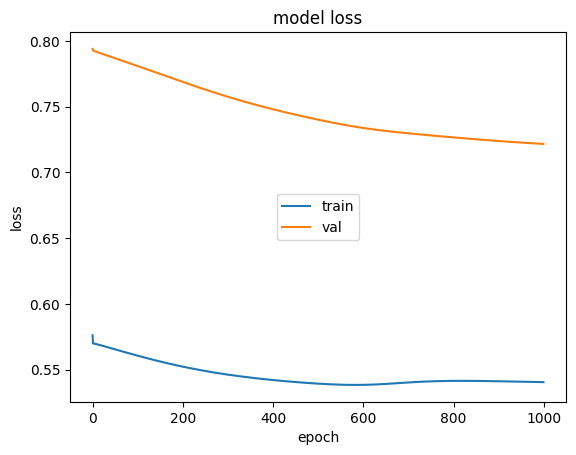

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [12]:
print("Pérdida en Entrenamiento")
modelo1.evaluate(
    x = x_train,
    y = y_train,
    batch_size=1
)
print("Pérdida en Validación")
modelo1.evaluate(
    x = x_val,
    y = y_val,
    batch_size=1
)
print("Pérdida en Prueba")
modelo1.evaluate(
    x = x_test,
    y = y_test,
    batch_size=1
)

Pérdida en Entrenamiento
161/161 [==============================] - 0s 512us/step - loss: 0.5320
Pérdida en Validación
53/53 [==============================] - 0s 430us/step - loss: 0.7221
Pérdida en Prueba
52/52 [==============================] - 0s 438us/step - loss: 0.5223


0.522267758846283

In [20]:
modelo2 = Sequential()

lote = 1
paso = 1
caracteristicas = 1

modelo2.add(LSTM(lote, batch_input_shape=(lote, paso, caracteristicas), stateful=True, return_sequences=True))
modelo2.add(LSTM(lote, return_sequences=True, stateful=True))
modelo2.add(LSTM(lote, return_sequences=True, stateful=True))
modelo2.add(LSTM(lote, stateful=True))
modelo2.add(Dense(1))
modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 1, 1)                 12        
                                                                 
 lstm_2 (LSTM)               (1, 1, 1)                 12        
                                                                 
 lstm_3 (LSTM)               (1, 1, 1)                 12        
                                                                 
 lstm_4 (LSTM)               (1, 1)                    12        
                                                                 
 dense_1 (Dense)             (1, 1)                    2         
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
modelo2.compile(loss='mean_squared_error',optimizer="adam")

In [22]:
epocas = 1000
history= modelo2.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/1000
161/161 [==============================] - 3s 6ms/step - loss: 1.0125 - val_loss: 1.2004
Epoch 2/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0125 - val_loss: 1.2003
Epoch 3/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0124 - val_loss: 1.2002
Epoch 4/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0124 - val_loss: 1.2002
Epoch 5/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0123 - val_loss: 1.2001
Epoch 6/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0123 - val_loss: 1.2001
Epoch 7/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0122 - val_loss: 1.2000
Epoch 8/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0121 - val_loss: 1.1999
Epoch 9/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0119 - val_loss: 1.1998
Epoch 10/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.011

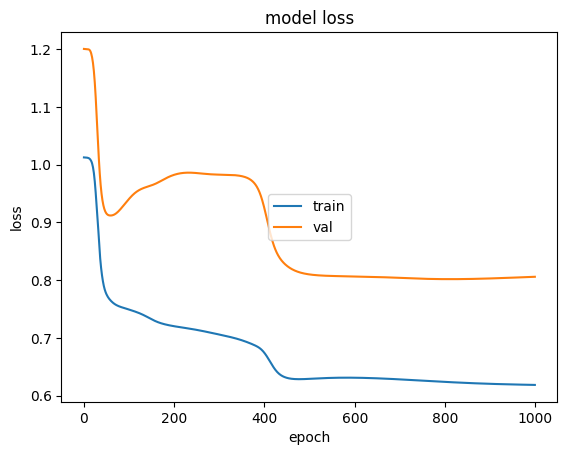

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

## Modelos multivariables (2 variables - Precio y mes)

In [60]:
data_diesel = pd.read_csv('data/data_diesel_diff.csv', sep=',')
data_diesel = data_diesel.drop(['anio'], axis=1)

In [61]:
scaler = StandardScaler()
data_diesel_scaled = scaler.fit_transform(data_diesel)

In [62]:
entrenamiento = round(0.6 * len(data_diesel_scaled))
val_prueba = round(0.2 * len(data_diesel_scaled))

train = data_diesel_scaled[:entrenamiento]
validation = data_diesel_scaled[entrenamiento:entrenamiento+val_prueba]
test = data_diesel_scaled[entrenamiento+val_prueba:]

train = np.insert(train, 0, [0, 0], axis=0)

print(len(test))

53


In [63]:
def supervisada_multi(serie, retrasos=1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos), :]
        valor_sig = serie[i+retrasos, :]
        serie_x.append(valor)
        serie_y.append(valor_sig[1])  
    return np.array(serie_x), np.array(serie_y)

x_train, y_train = supervisada_multi(train)
x_val, y_val = supervisada_multi(validation)
x_test, y_test = supervisada_multi(test)

In [64]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, 2))
x_val = np.reshape(x_val, (x_val.shape[0], 1, 2))
x_test = np.reshape(x_test, (x_test.shape[0], 1, 2))

In [65]:
modelo3 = Sequential()
lote = 1
paso = 1
caracteristicas = 2
modelo3.add(LSTM(lote, batch_input_shape=(lote, paso, caracteristicas), stateful=True))
modelo3.add(Dense(1))
modelo3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (1, 1)                    16        
                                                                 
 dense_11 (Dense)            (1, 1)                    2         
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
modelo3.compile(loss='mean_squared_error', optimizer="rmsprop")

In [67]:
epocas = 1000
history = modelo3.fit(
    x=x_train,
    y=y_train,
    batch_size=lote,
    epochs=epocas,
    shuffle=False,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/1000
161/161 [==============================] - 1s 2ms/step - loss: 1.0946 - val_loss: 1.2915
Epoch 2/1000
161/161 [==============================] - 0s 914us/step - loss: 1.0776 - val_loss: 1.2733
Epoch 3/1000
161/161 [==============================] - 0s 806us/step - loss: 1.0635 - val_loss: 1.2579
Epoch 4/1000
161/161 [==============================] - 0s 793us/step - loss: 1.0516 - val_loss: 1.2451
Epoch 5/1000
161/161 [==============================] - 0s 836us/step - loss: 1.0417 - val_loss: 1.2345
Epoch 6/1000
161/161 [==============================] - 0s 932us/step - loss: 1.0335 - val_loss: 1.2258
Epoch 7/1000
161/161 [==============================] - 0s 913us/step - loss: 1.0267 - val_loss: 1.2187
Epoch 8/1000
161/161 [==============================] - 0s 840us/step - loss: 1.0211 - val_loss: 1.2128
Epoch 9/1000
161/161 [==============================] - 0s 845us/step - loss: 1.0164 - val_loss: 1.2078
Epoch 10/1000
161/161 [==============================] - 0s 886us/

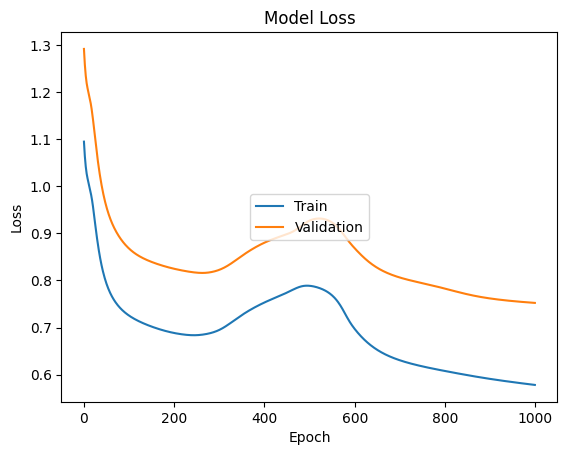

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center')
plt.show()

In [73]:
modelo4 = Sequential()
lote = 1
paso = 1
caracteristicas = 2
modelo4.add(LSTM(lote, batch_input_shape=(lote, paso, caracteristicas), return_sequences=True, stateful=True))
modelo4.add(LSTM(lote, return_sequences=True, stateful=True))
modelo4.add(LSTM(lote, return_sequences=True, stateful=True))
modelo4.add(LSTM(lote, stateful=True))
modelo4.add(Dense(1))

In [74]:
modelo4.compile(loss='mean_squared_error', optimizer="adam")

In [75]:
epocas = 1000
history = modelo4.fit(
    x=x_train,
    y=y_train,
    batch_size=lote,
    epochs=epocas,
    shuffle=False,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/1000
161/161 [==============================] - 3s 6ms/step - loss: 1.0131 - val_loss: 1.2009
Epoch 2/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0130 - val_loss: 1.2007
Epoch 3/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0129 - val_loss: 1.2006
Epoch 4/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0128 - val_loss: 1.2006
Epoch 5/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0128 - val_loss: 1.2006
Epoch 6/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0128 - val_loss: 1.2007
Epoch 7/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0128 - val_loss: 1.2007
Epoch 8/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0128 - val_loss: 1.2007
Epoch 9/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.0128 - val_loss: 1.2008
Epoch 10/1000
161/161 [==============================] - 0s 2ms/step - loss: 1.012

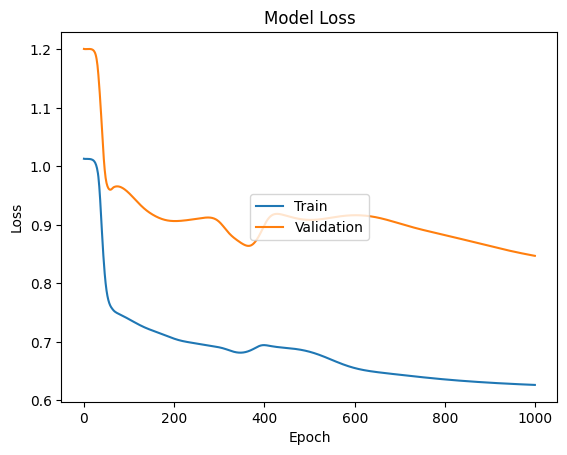

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center')
plt.show()

## Análisis de resultados
### Comparación de modelos LSTM
Basandose en los cuatro modelos LSTM generados, se pudo ver que mientras más capas de LSTM se implementaron hubo un menor sobreajuste, por tanto, se obtuvo una mayor precisión para los resultados pero el proceso fue más lento. Además, se observó que los modelos multivariables con las variables del precio de diesel y el mes de importación tuvieron resultados mejores que con solo una variable. Por otra parte, cabe resaltar que el mejor optimizador para las redes LSTM en este caso fue rmsprop.

